# Pokemon Segmentation

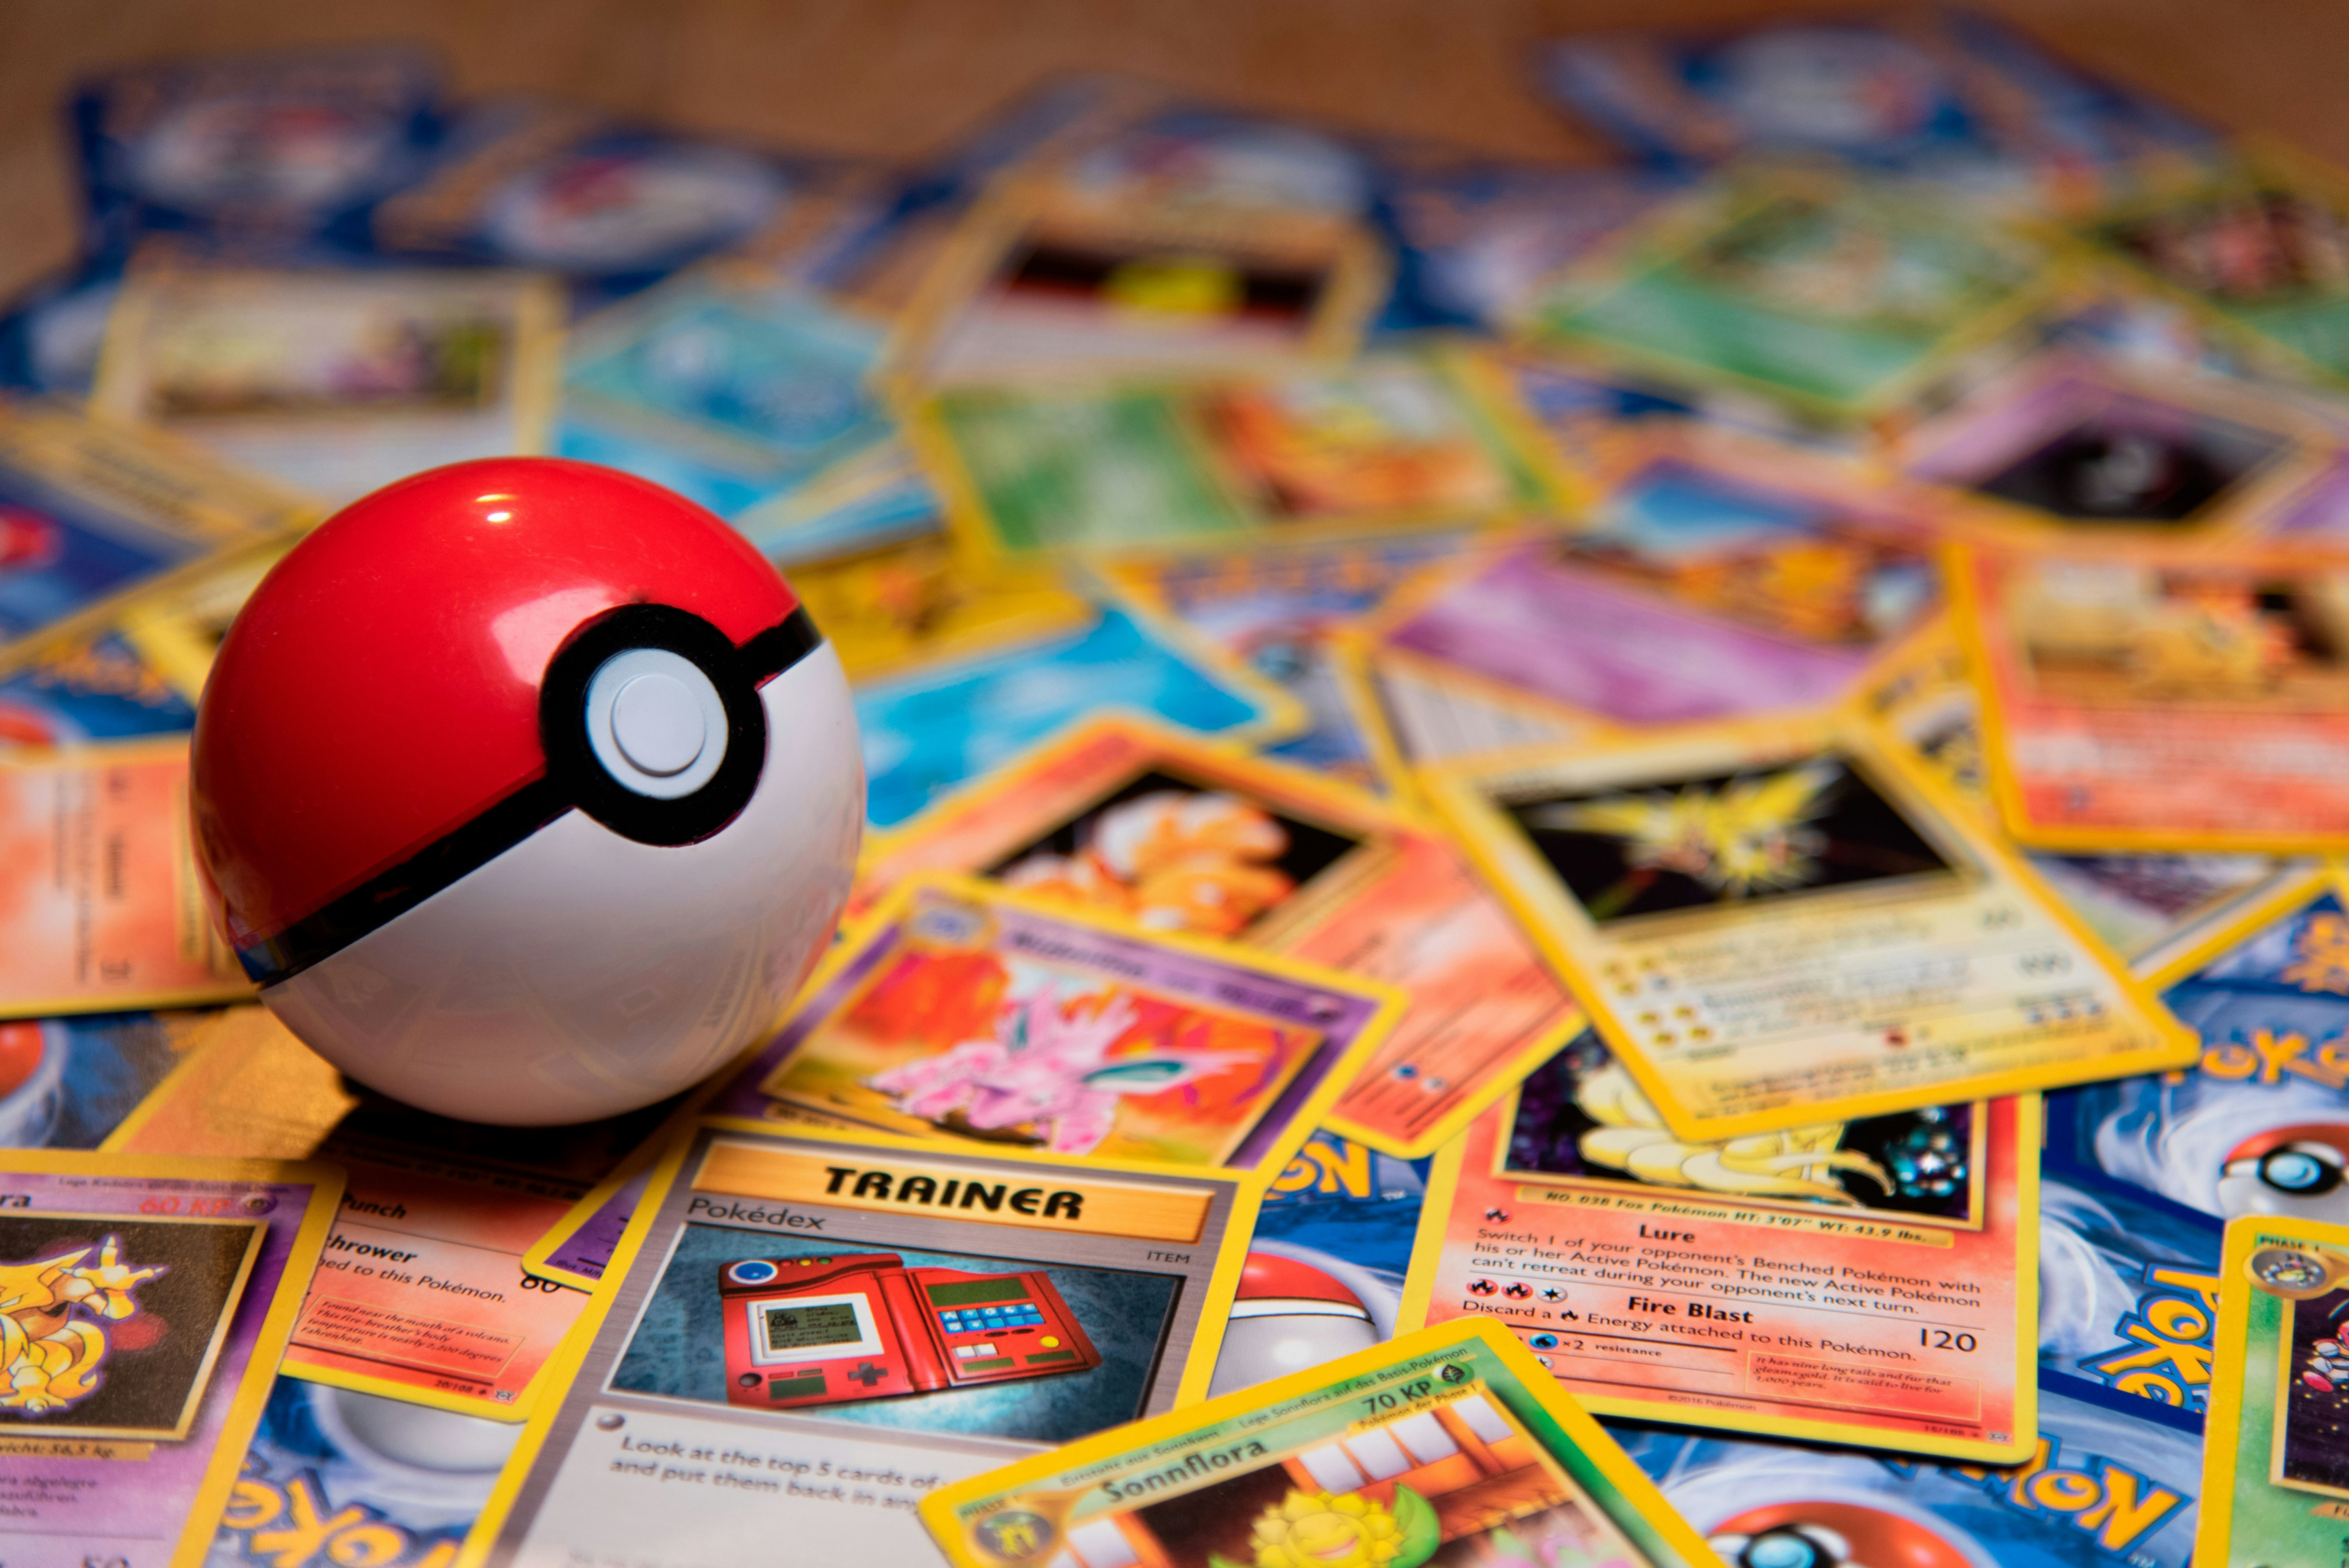

### Installing Packages

In [ ]:
!pip install pycaret --quiet
!pip install seaborn --quiet

### Importing Libraries

In [1]:
import pandas as pd
from pycaret.datasets import get_data
from pycaret.clustering import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data

In [2]:
df = get_data("pokemon")

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

### Exploratory Data Analysis

In [3]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [4]:
df.drop(["#", 'Name'], axis=1, inplace=True)

In [5]:
for col in df.describe(include="object"):
    print(col, df[col].unique())

Type 1 ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
Type 2 ['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']


In [6]:
df["Legendary"] = df["Legendary"].astype(int)

### Clustering

In [7]:
setup(data=df)

In [8]:
kmeans = create_model('kmeans', 4)

In [9]:
kmeans_result = assign_model(kmeans)
kmeans_result

Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0      Grass  Poison    318  45      49       49       65       65     45   
1      Grass  Poison    405  60      62       63       80       80     60   
2      Grass  Poison    525  80      82       83      100      100     80   
3      Grass  Poison    625  80     100      123      122      120     80   
4       Fire     NaN    309  39      52       43       60       50     65   
..       ...     ...    ...  ..     ...      ...      ...      ...    ...   
795     Rock   Fairy    600  50     100      150      100      150     50   
796     Rock   Fairy    700  50     160      110      160      110    110   
797  Psychic   Ghost    600  80     110       60      150      130     70   
798  Psychic    Dark    680  80     160       60      170      130     80   
799     Fire   Water    600  80     110      120      130       90     70   

     Generation  Legendary    Cluster  
0             1          0  Cluster 0  
1             1          0  Cluster 3  
2             1          0  Cluster 1  
3             1          0  Cluster 2  
4             1          0  Cluster 0  
..          ...        ...        ...  
795           6          1  Cluster 2  
796           6          1  Cluster 2  
797           6          1  Cluster 2  
798           6          1  Cluster 2  
799           6          1  Cluster 2  

[800 rows x 12 columns]

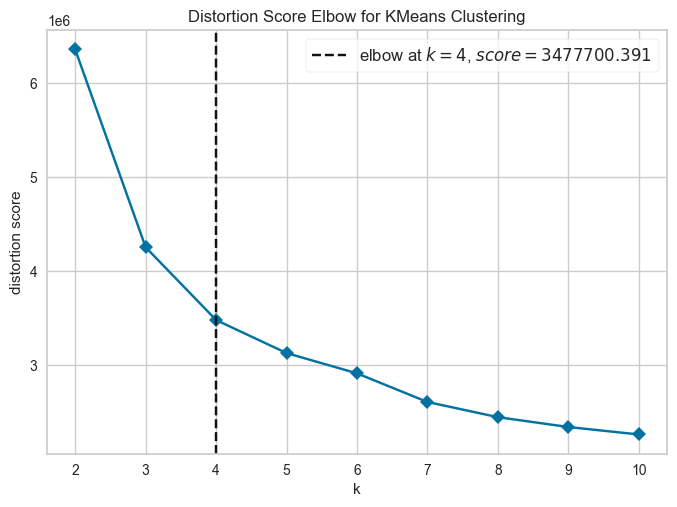

In [10]:
plot_model(kmeans, plot="elbow")

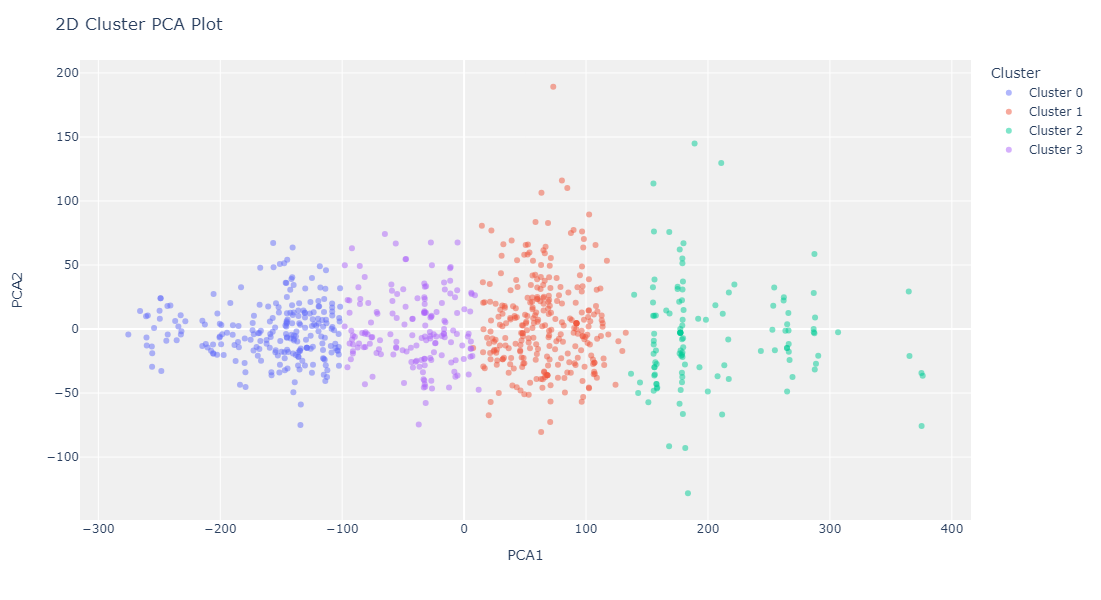

In [11]:
plot_model(kmeans)

In [12]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
def plot_features(data, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data)
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {title}")
    plt.show()

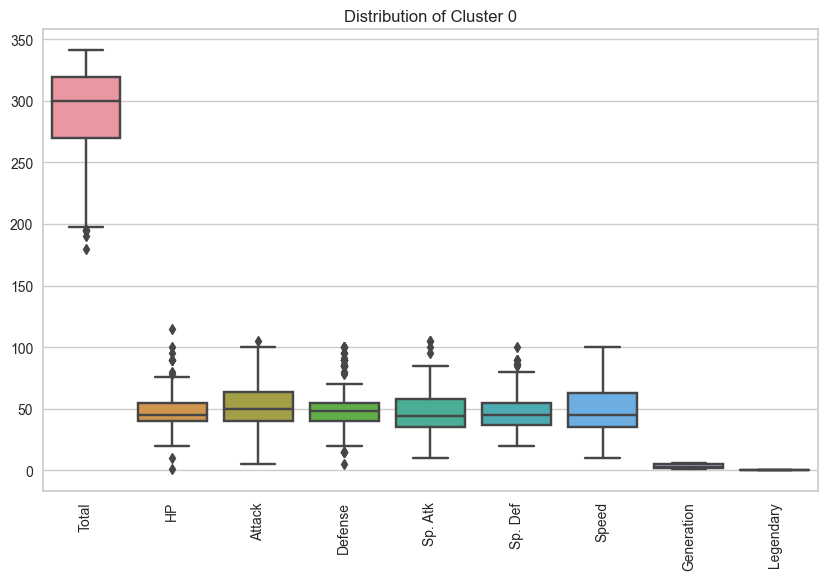

In [14]:
plot_features(kmeans_result[kmeans_result["Cluster"] == "Cluster 0"], "Cluster 0")

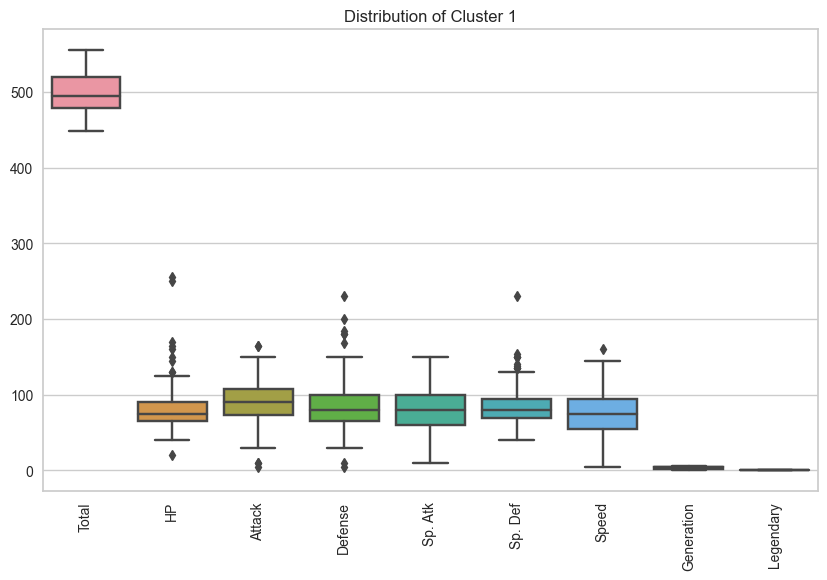

In [15]:
plot_features(kmeans_result[kmeans_result["Cluster"] == "Cluster 1"], "Cluster 1")

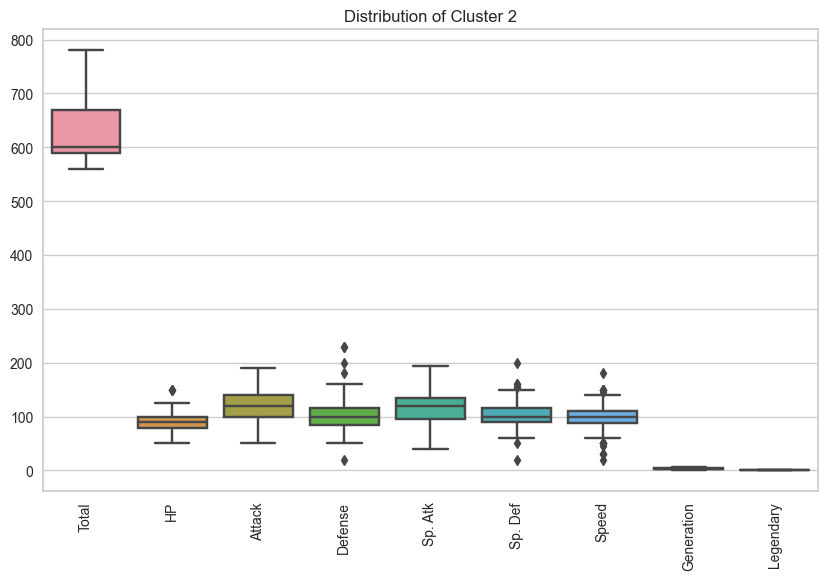

In [16]:
plot_features(kmeans_result[kmeans_result["Cluster"] == "Cluster 2"], "Cluster 2")

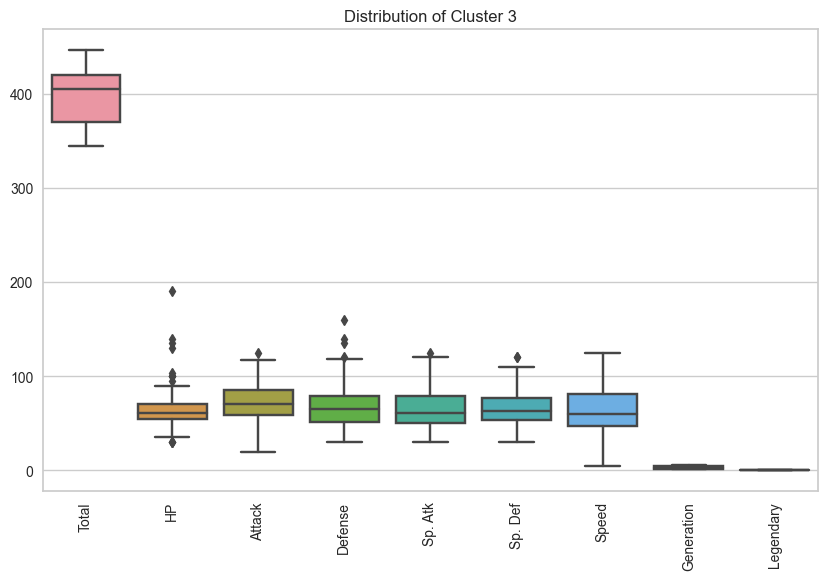

In [17]:
plot_features(kmeans_result[kmeans_result["Cluster"] == "Cluster 3"], "Cluster 3")

In [18]:
save_model(kmeans,'clustering_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Total', 'HP', 'Attack', 'Defense',
                                              'Sp. Atk', 'Sp. Def', 'Speed',
                                              'Generation', 'Legendary'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Type 1', 'Type 2'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Type 1', 'Type 2'],
                                     transformer=OneHotEncoder(cols=['Type 1',
                                                                     'Type 2'],
                                                               handle_missing='return_nan',
                                                               us

In [19]:
kmeans_result.to_csv("../../output/clustered_data.csv", index=False)